HR Analytics.project

# Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


HR Analytics

Attrition in HR

Attrition affecting Companies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Giving the Dataset the structured format with the Data Frame Function and giving it name "hr_analytics"
hr_analytics=pd.DataFrame(data=df)
hr_analytics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA

In [4]:

# Displaying all the columns in the Dataset
hr_analytics.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Displaying the total missing values and Data Type of every column of the hr analytics Dataset
hr_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# There are no missing values present in this Dataset
hr_analytics.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:xlabel='Attrition', ylabel='count'>

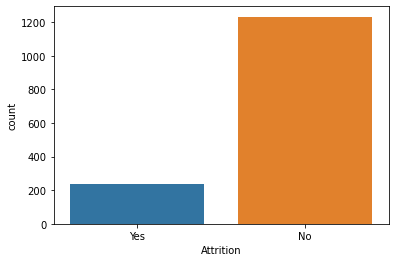

In [7]:
sns.countplot(hr_analytics["Attrition"])


We can see that there are very less people who leave organisation as compared to who dont
Clearly in this case we have a class imbalance problem

<AxesSubplot:xlabel='Attrition', ylabel='count'>

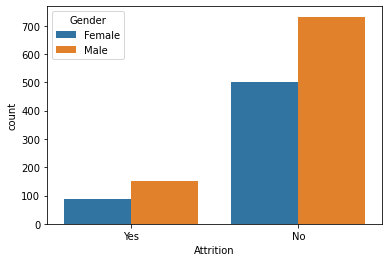

In [8]:
sns.countplot(hr_analytics["Attrition"],hue=hr_analytics["Gender"])

Graphical Representation of People leaving the organisation with their gender information

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

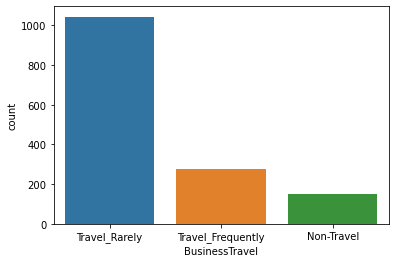

In [9]:
sns.countplot(hr_analytics["BusinessTravel"])

Graphical Representation shows that there are most people in category which rarely travel

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

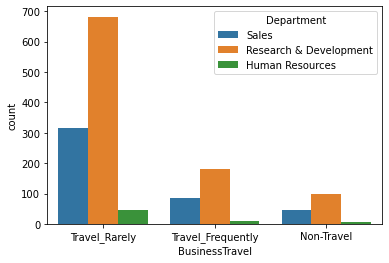

In [10]:
sns.countplot(hr_analytics["BusinessTravel"],hue=hr_analytics["Department"])

Graphical Representation shows that Most people who dont travel are from Research & Development department

<AxesSubplot:xlabel='Department', ylabel='count'>

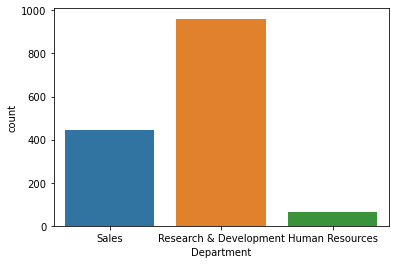

In [11]:
sns.countplot(hr_analytics["Department"])


The Graphical Representation shows the names of all the departments

<AxesSubplot:xlabel='EducationField', ylabel='count'>

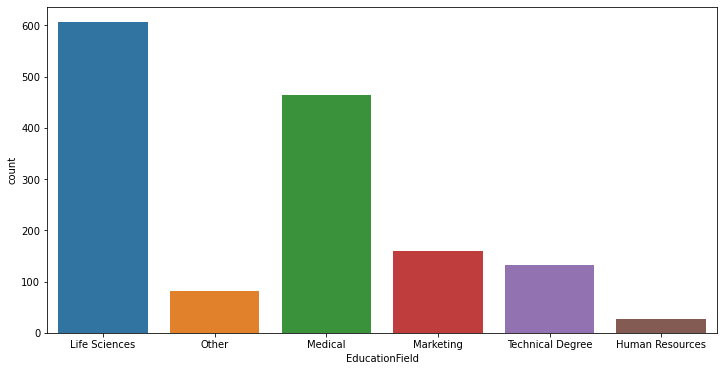

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(hr_analytics["EducationField"])


The Graphical Representation showing the Education Fields of all the employees

<AxesSubplot:xlabel='EducationField', ylabel='count'>

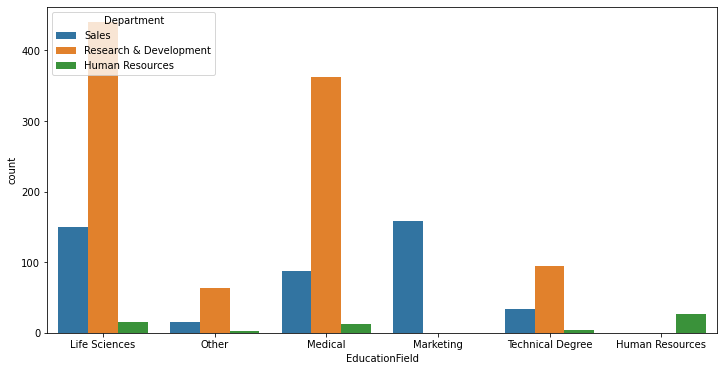

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(hr_analytics["EducationField"],hue=hr_analytics["Department"])

 The Graphical Representation showing the Education Fields of all the employees with their respective departments

<AxesSubplot:xlabel='Department', ylabel='count'>

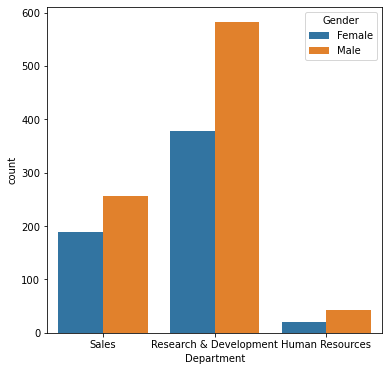

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(hr_analytics["Department"],hue=hr_analytics["Gender"])



The Graphical Representation showing the gender wise distribution in each department
Research & Development Department has most Males and Females working

<AxesSubplot:xlabel='EducationField', ylabel='count'>

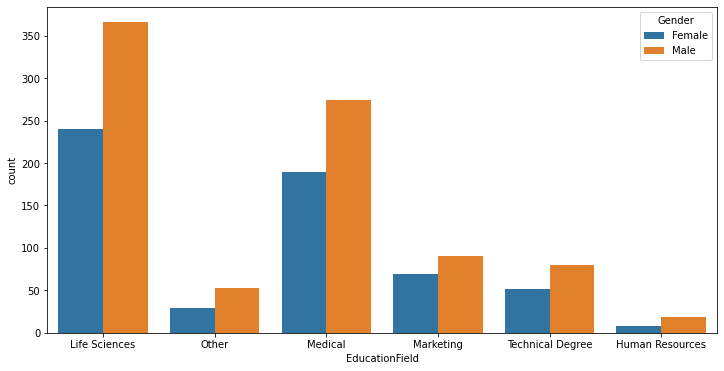

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(hr_analytics["EducationField"],hue=hr_analytics["Gender"])


Graphical Representation showing the Education Fields of all the employees with their gender
All Education Fields have higher ratio of Male to Female

<AxesSubplot:xlabel='JobRole', ylabel='count'>

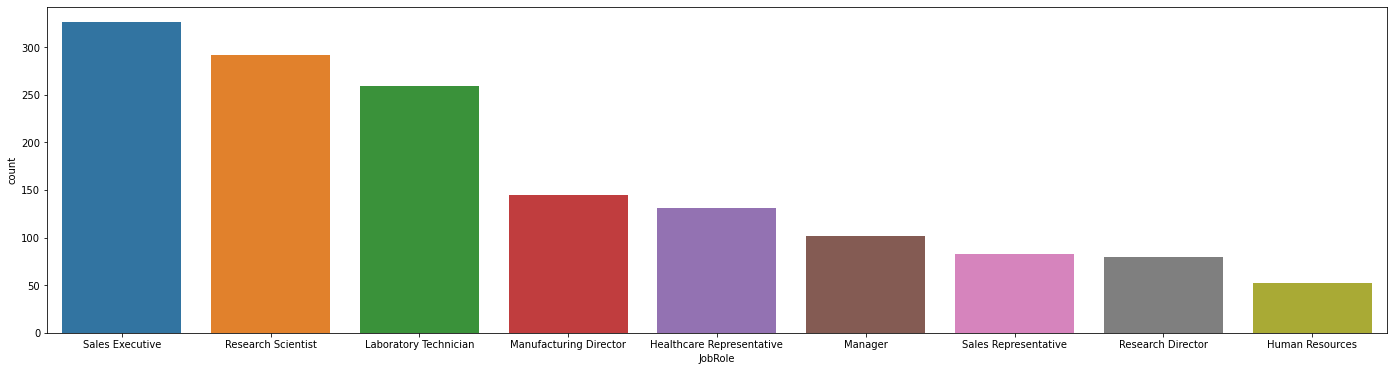

In [16]:
plt.figure(figsize=(24,6))
sns.countplot(hr_analytics["JobRole"])

 Graphical Representation showing the Job Roles of all the employees
Most people are in Sales Job Role and least in Humar Resource

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

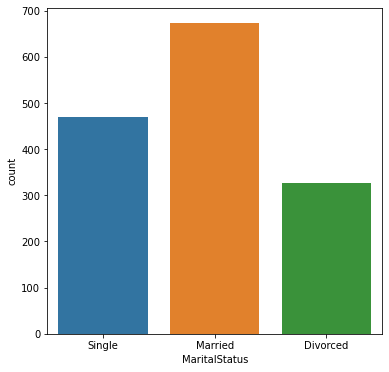

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(hr_analytics["MaritalStatus"])


Graphical Representation showing the Marital Status of all the employees
Most Employees in the organisation are married

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

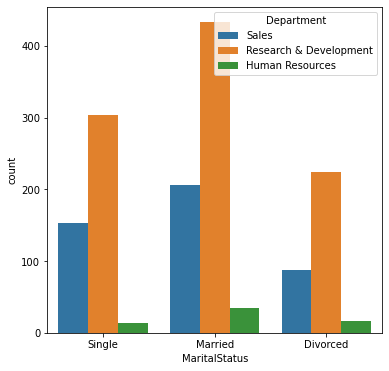

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(hr_analytics["MaritalStatus"], hue=hr_analytics["Department"])


Graphical Representation of Marital Status of employees according to their departments

<AxesSubplot:xlabel='Over18', ylabel='count'>

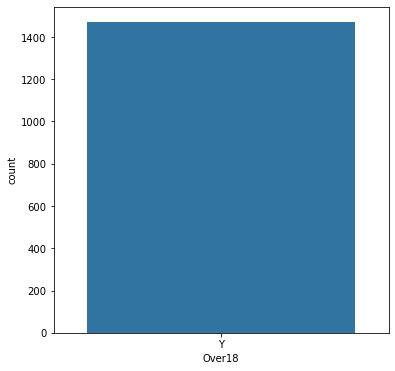

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(hr_analytics["Over18"])

 Here we can see that throughout all rows the value is same and all employees are above 18, so we will drop this column

<AxesSubplot:xlabel='OverTime', ylabel='count'>

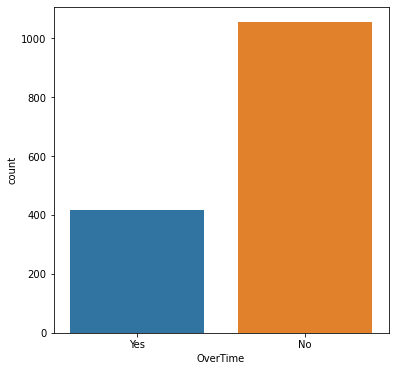

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(hr_analytics["OverTime"])

Showing the number of employees who work overtime in contrast to those who dont

<AxesSubplot:xlabel='OverTime', ylabel='count'>

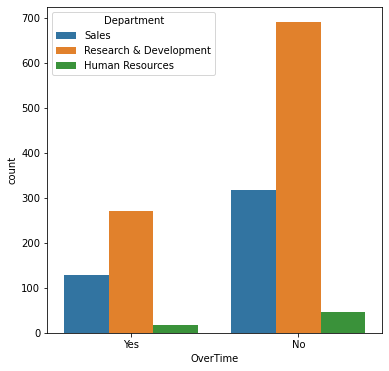

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(hr_analytics["OverTime"],hue=hr_analytics["Department"])

Graphical Representation of employees working overtime according to their departments

<AxesSubplot:xlabel='Department', ylabel='DailyRate'>

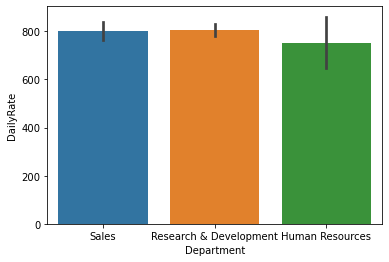

In [22]:
sns.barplot(x=hr_analytics["Department"],y=hr_analytics["DailyRate"])

Graphical Representation of Department daily rates paid to the employees
 We can see that all departments almost has equal pay

<AxesSubplot:xlabel='Department', ylabel='EnvironmentSatisfaction'>

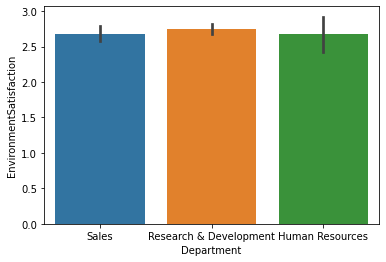

In [23]:
sns.barplot(x=hr_analytics["Department"],y=hr_analytics["EnvironmentSatisfaction"])

Graphical Representation of the Environmental Satisfaction according to working in different departments

<AxesSubplot:xlabel='Gender', ylabel='EnvironmentSatisfaction'>

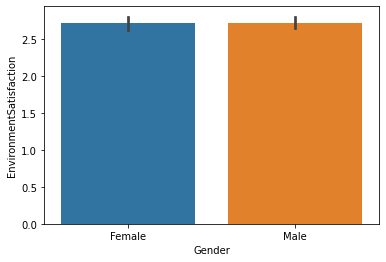

In [24]:
sns.barplot(x=hr_analytics["Gender"],y=hr_analytics["EnvironmentSatisfaction"])

Graphical Representation of the Environmental Satisfaction according to the gender which shows equal satisfaction

<AxesSubplot:xlabel='Gender', ylabel='HourlyRate'>

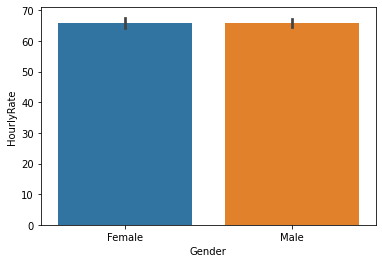

In [25]:
sns.barplot(x=hr_analytics["Gender"],y=hr_analytics["HourlyRate"])

Graphical Representation of the Hourly rate according to gender is equal which means the organization follows equal pay

<AxesSubplot:xlabel='Gender', ylabel='MonthlyRate'>

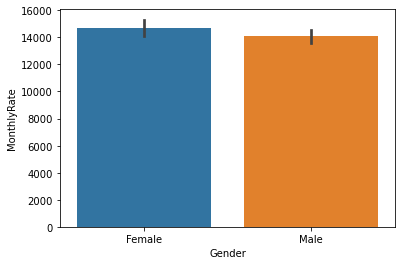

In [26]:
sns.barplot(x=hr_analytics["Gender"],y=hr_analytics["MonthlyRate"])

Graphical Representation of the Monthly rate according to gender is equal which means the organization follows equal pay

<AxesSubplot:xlabel='Gender', ylabel='PercentSalaryHike'>

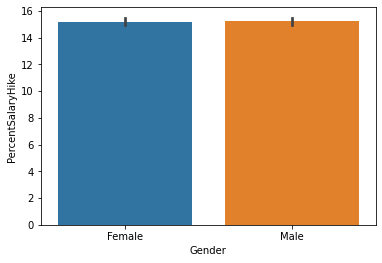

In [27]:
sns.barplot(x=hr_analytics["Gender"],y=hr_analytics["PercentSalaryHike"])

Graphical Representation of the Percent Salary Hike according to gender is equal
which means the organization follows equal pay

<AxesSubplot:xlabel='OverTime', ylabel='PerformanceRating'>

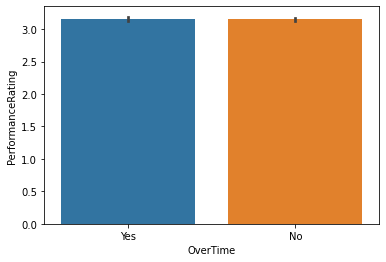

In [28]:
sns.barplot(x=hr_analytics["OverTime"],y=hr_analytics["PerformanceRating"])


Graphical Representation of the Performance Rating according to overtime shows it does not have any impact on performance

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

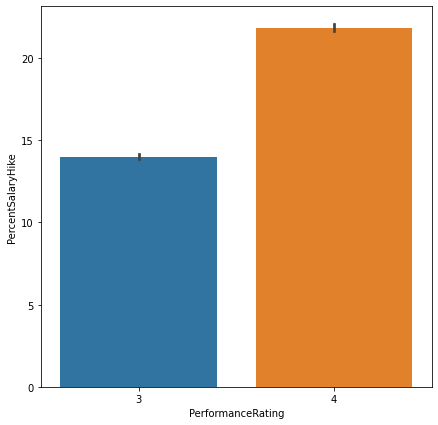

In [29]:
plt.figure(figsize=(7,7))
sns.barplot(x=hr_analytics["PerformanceRating"],y=hr_analytics["PercentSalaryHike"])

Graphical Representation shows that the performance rating affects the salary hike
 which means the better performance the better salary 

<AxesSubplot:xlabel='YearsAtCompany', ylabel='JobSatisfaction'>

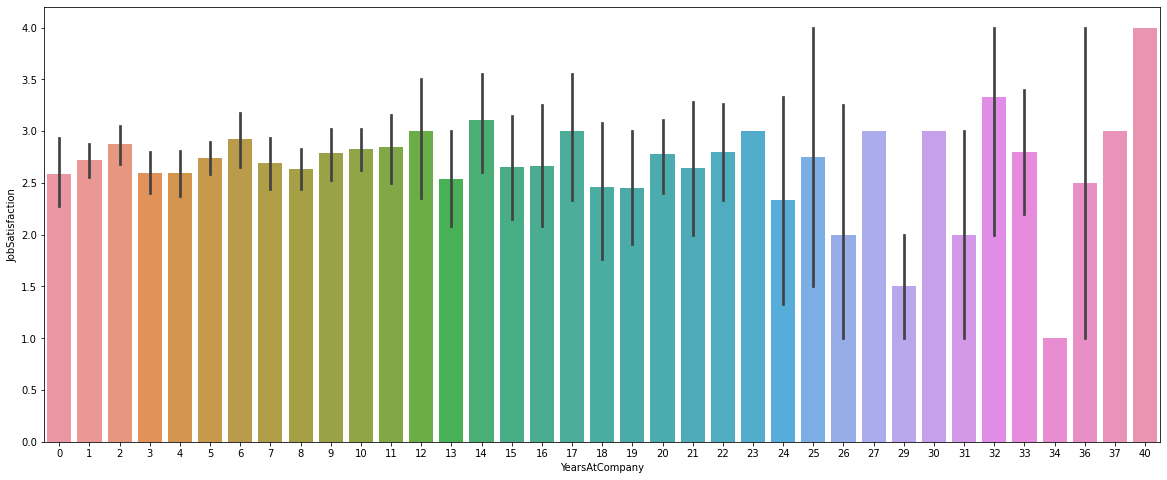

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x=hr_analytics["YearsAtCompany"],y=hr_analytics["JobSatisfaction"])


Graphical Representation shows that years spent at company does not have direct relation with job satisfaction

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='JobSatisfaction'>

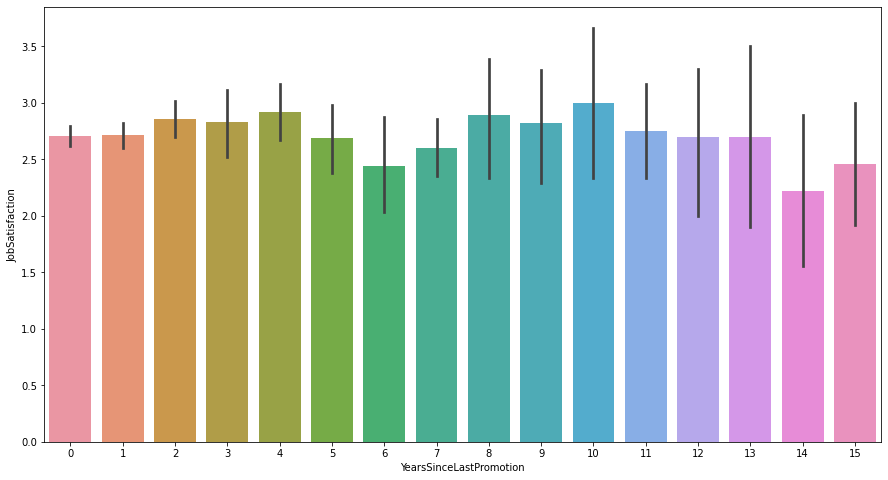

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x=hr_analytics["YearsSinceLastPromotion"],y=hr_analytics["JobSatisfaction"])

Graphical Representation shows that years since last promotion somewhat affects job satisfaction

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='YearsWithCurrManager'>

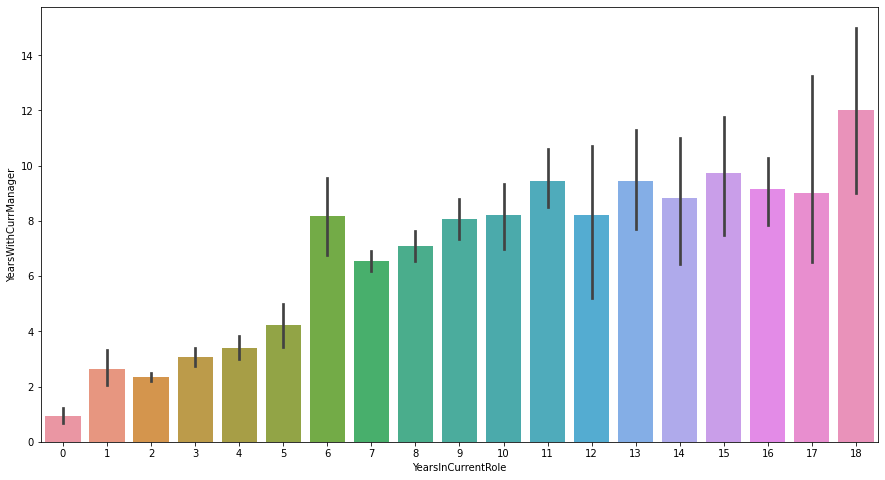

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x=hr_analytics["YearsInCurrentRole"],y=hr_analytics["YearsWithCurrManager"])

Graphical Representation shows that the people working under current role are mostly working under same current manager 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='JobLevel'>

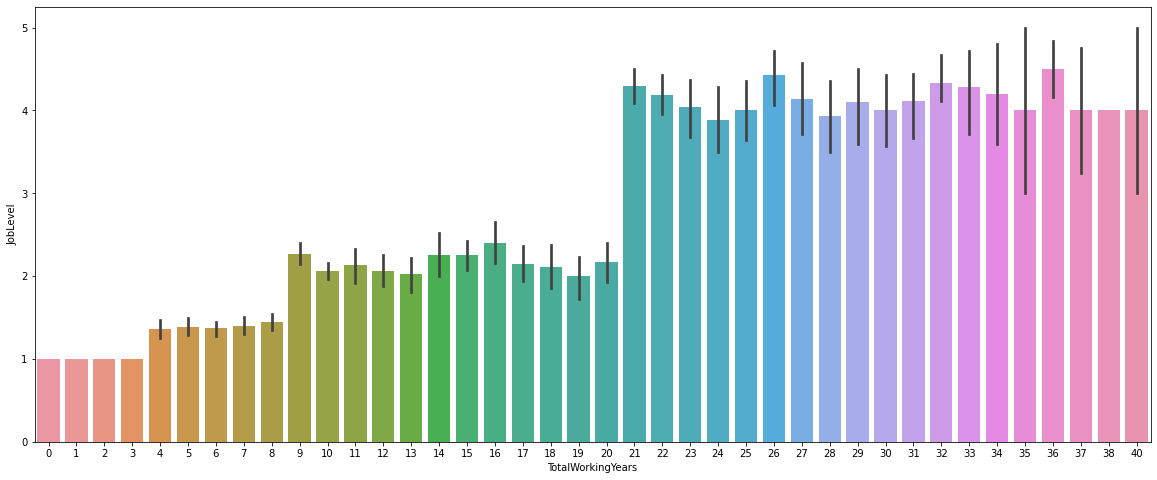

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(x=hr_analytics["TotalWorkingYears"],y=hr_analytics["JobLevel"])


Graphical Representation showing increase in job level with increase in total working years 

# Ordinal Encoding:

In [34]:
#Importing Ordinal Encoder from sklearn Library
from sklearn.preprocessing import OrdinalEncoder


In [35]:
ore=OrdinalEncoder()

In [36]:
for i in hr_analytics.columns:
    if hr_analytics[i].dtypes=="object":
        hr_analytics[i]=ore.fit_transform(hr_analytics[i].values.reshape(-1,1))
        

Running a for loop to give numeric values to strings using the Ordinal Encoder in training data

In [37]:
hr_analytics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Checking Correlation:

In [38]:
hr_analytics_corr=hr_analytics.corr()
hr_analytics_corr


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


Showing the correlation between independent variables and target variable

<AxesSubplot:>

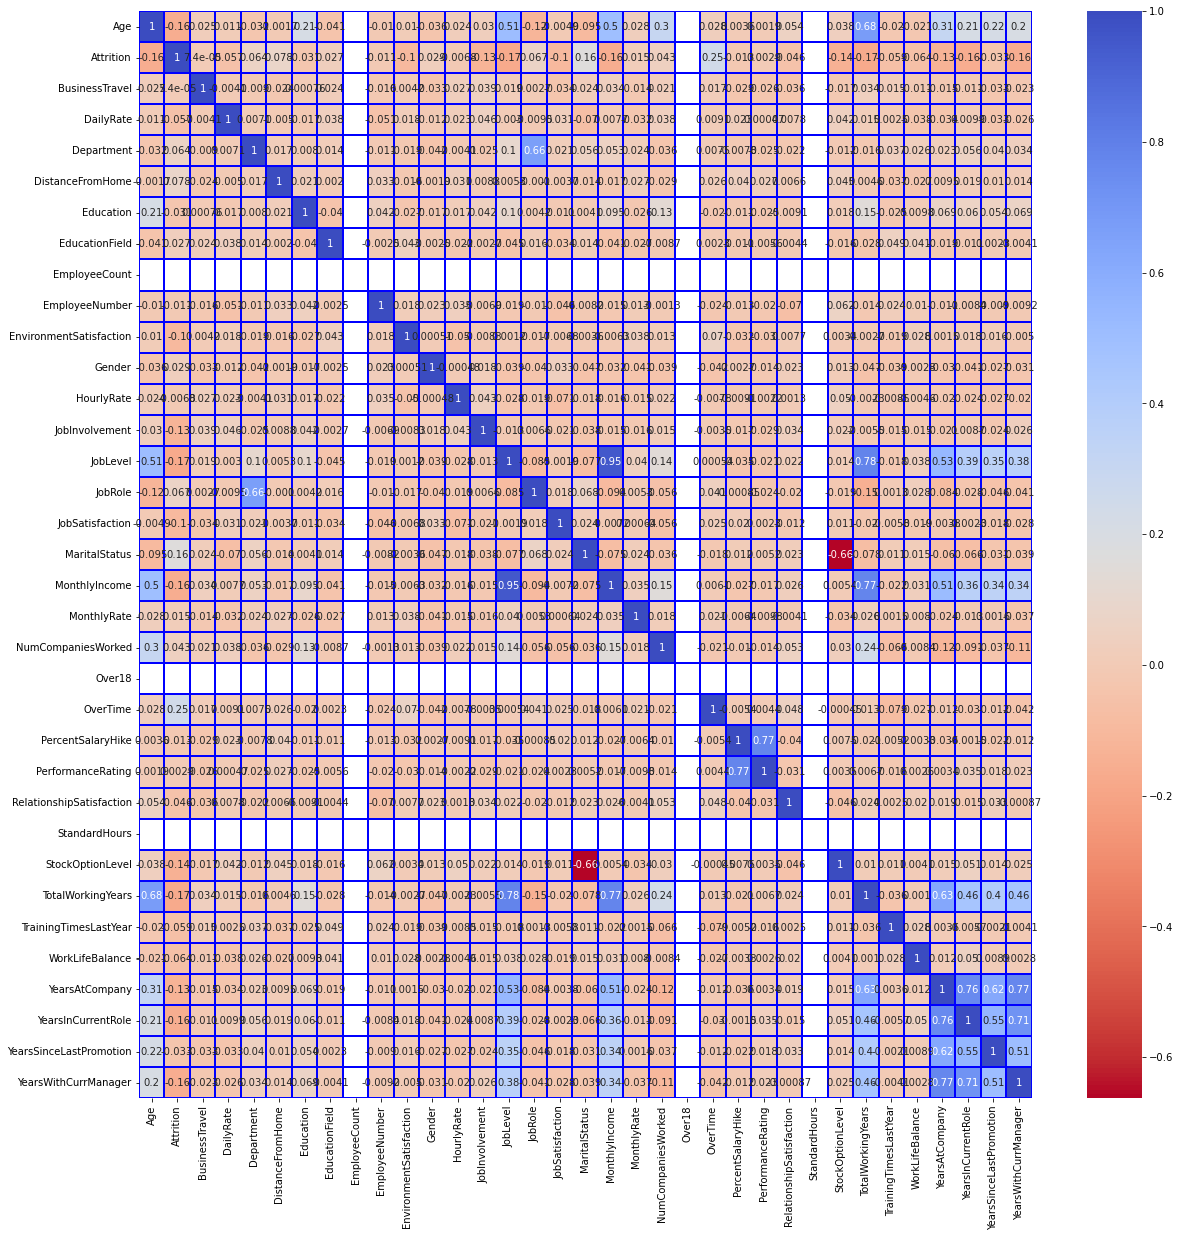

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(hr_analytics_corr, annot=True, linewidths=2, linecolor="blue", cmap="coolwarm_r")


Heatmap showing the correlation of independent variables with target variable
Percent Salary hike is very positively related with performance rating
Years at company and years with current manager has high positive relationship

# checking Outlier:

In [40]:
hr_analytics.quantile([0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,0.96,0.97,0.98,0.99,1]).T


,0.05,0.10,0.20,0.25,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.90,0.95,0.96,0.97,0.98,0.99,1.00
Age,24.00,26.0,29.0,30.00,31.0,34.0,36.0,38.0,41.0,43.00,45.0,50.0,54.00,55.00,56.00,57.00,58.31,60.0
Attrition,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.00,1.00,1.00,1.00,1.00,1.0
BusinessTravel,0.00,0.0,1.0,1.00,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.00,2.00,2.00,2.00,2.00,2.0
DailyRate,165.35,242.8,391.8,465.00,530.7,656.2,802.0,942.4,1094.6,1157.00,1224.2,1356.0,1424.10,1442.24,1455.86,1469.62,1485.00,1499.0
Department,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.00,2.0,2.0,2.00,2.00,2.00,2.00,2.00,2.0
DistanceFromHome,1.00,1.0,2.0,2.00,3.0,5.0,7.0,9.0,11.0,14.00,17.0,23.0,26.00,27.00,28.00,28.00,29.00,29.0
Education,1.00,1.0,2.0,2.00,2.0,3.0,3.0,3.0,4.0,4.00,4.0,4.0,4.00,4.00,5.00,5.00,5.00,5.0
EducationField,1.00,1.0,1.0,1.00,1.0,1.0,2.0,3.0,3.0,3.00,3.0,4.0,5.00,5.00,5.00,5.00,5.00,5.0
EmployeeCount,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.0
EmployeeNumber,96.45,198.9,402.6,491.25,590.7,814.2,1020.5,1235.8,1448.3,1555.75,1654.2,1857.1,1967.55,1986.24,2008.93,2024.62,2046.62,2068.0


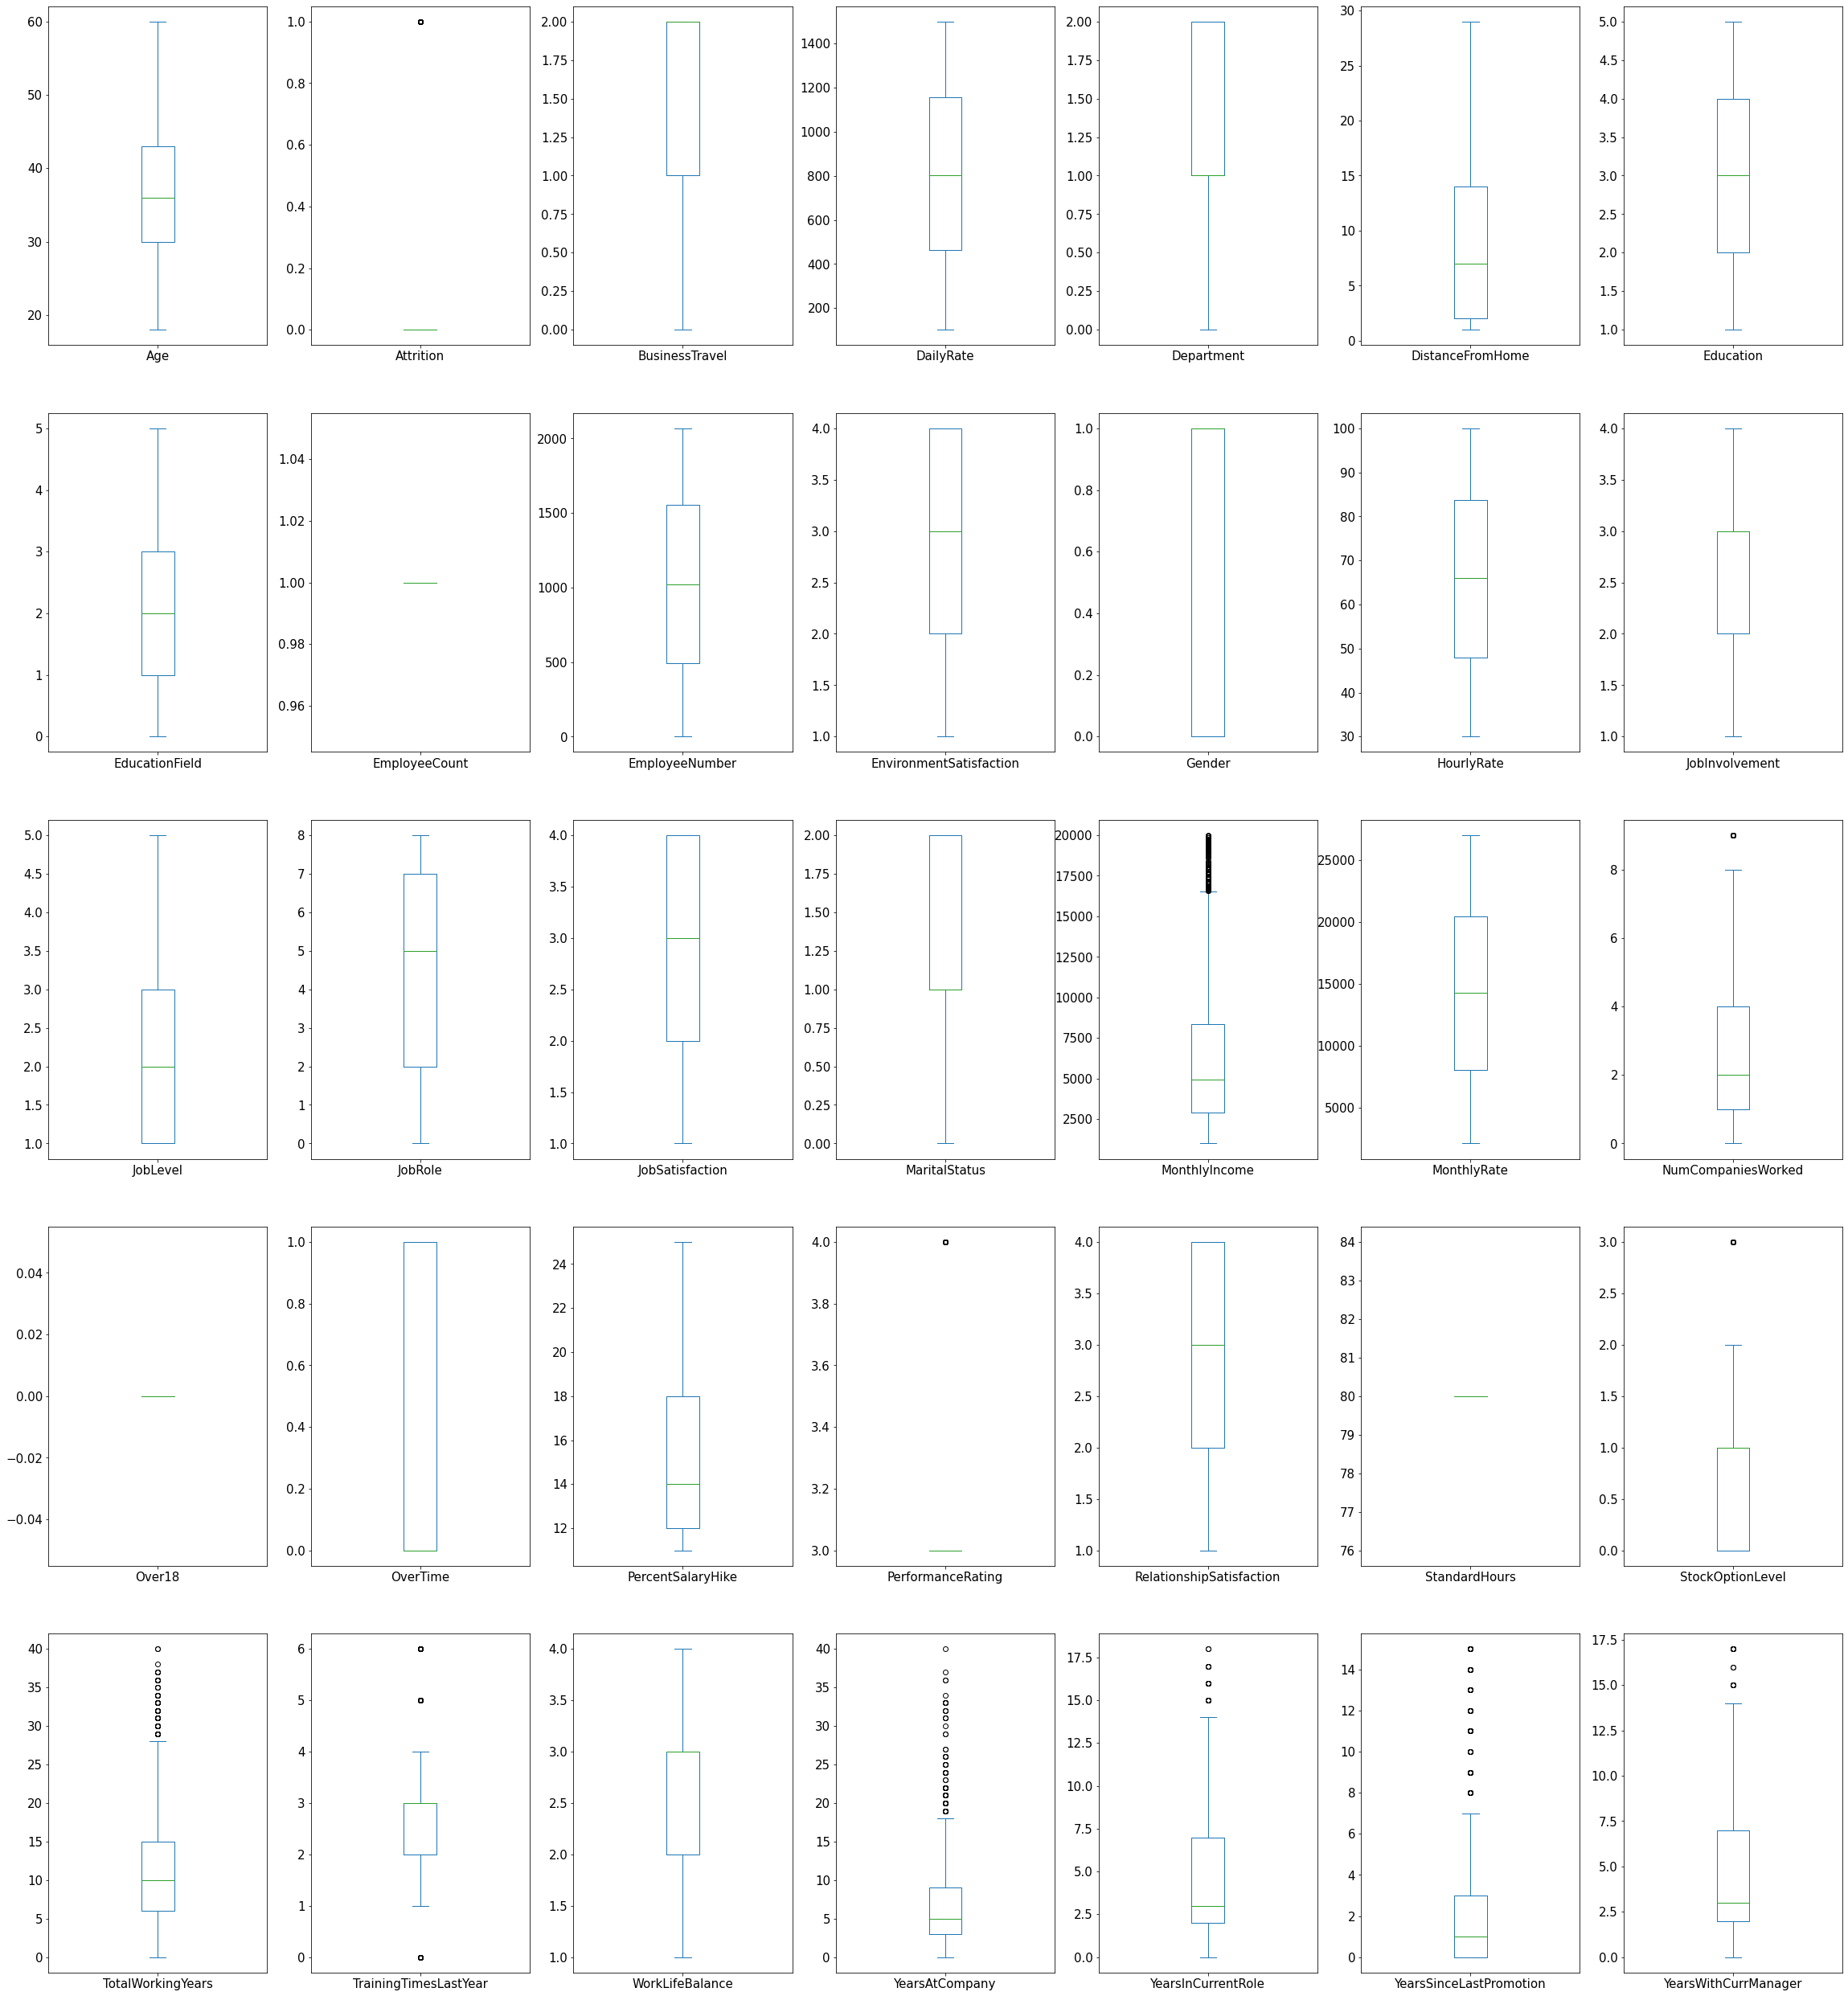

In [41]:
hr_analytics.plot(kind="box", subplots=True, layout=(5,7), figsize=(40,45), fontsize=15)
plt.show()

Graphical Representation of Boxplots of all the columns
 Few columns represent many outliers present in the dataset

# Checking Skewness:

In [42]:
hr_analytics.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                      float64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [43]:
hr_analytics.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

Checking the skewness of the columns in the hr analytics dataset
 Many columns have high skewness level

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

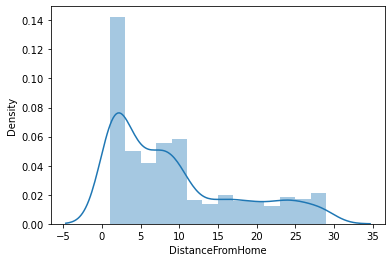

In [44]:
sns.distplot(hr_analytics["DistanceFromHome"])

Distance From Home column has high skewness towards right

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

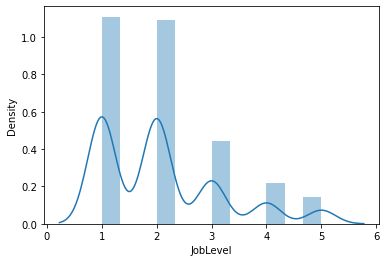

In [45]:
sns.distplot(hr_analytics["JobLevel"])


Job Level column has high skewness towards right

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

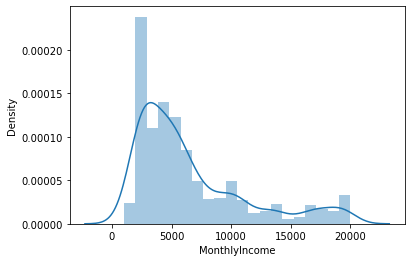

In [46]:
sns.distplot(hr_analytics["MonthlyIncome"])


Number of Companies Worked column has high skewness towards right

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

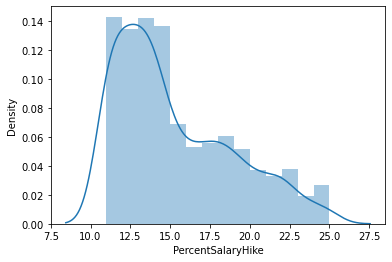

In [47]:
sns.distplot(hr_analytics["PercentSalaryHike"])


 Percent Salary Hike column has high skewness towards right

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

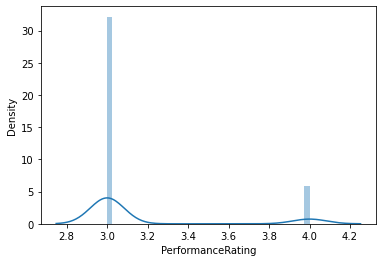

In [48]:
sns.distplot(hr_analytics["PerformanceRating"])

Performance Rating column has high skewness towards right

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

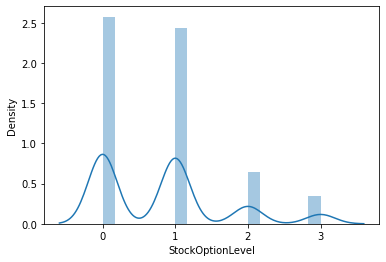

In [49]:
sns.distplot(hr_analytics["StockOptionLevel"])


Stock Option Level column has high skewness towards right

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

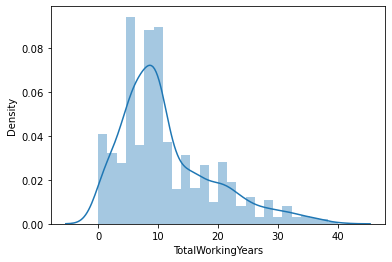

In [50]:
sns.distplot(hr_analytics["TotalWorkingYears"])

Total Working Years column has high skewness towards right

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

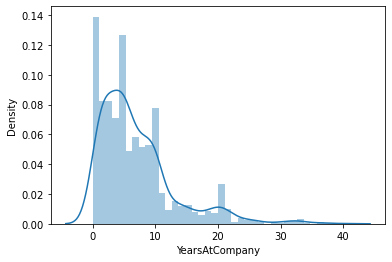

In [51]:
sns.distplot(hr_analytics["YearsAtCompany"])

Years At Company column has high skewness towards right

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

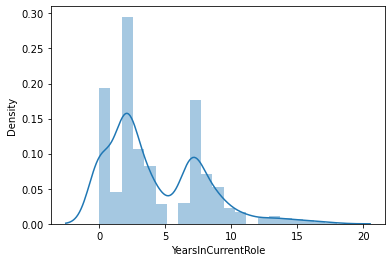

In [52]:
sns.distplot(hr_analytics["YearsInCurrentRole"])

Years In Current Role column has high skewness towards right

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

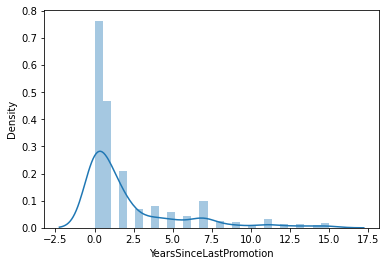

In [53]:
sns.distplot(hr_analytics["YearsSinceLastPromotion"])

Years Since Last Promotion column has high skewness towards right

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

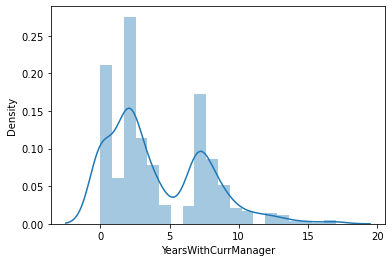

In [54]:
sns.distplot(hr_analytics["YearsWithCurrManager"])

Years With Current Manager column has high skewness towards right

# Data Cleaning:

In [55]:
hr_analytics.drop(columns=["EmployeeCount","Over18","StandardHours"],inplace=True)

In [56]:
hr_analytics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [57]:
hr_analytics_corr=hr_analytics.corr()
hr_analytics_corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<AxesSubplot:>

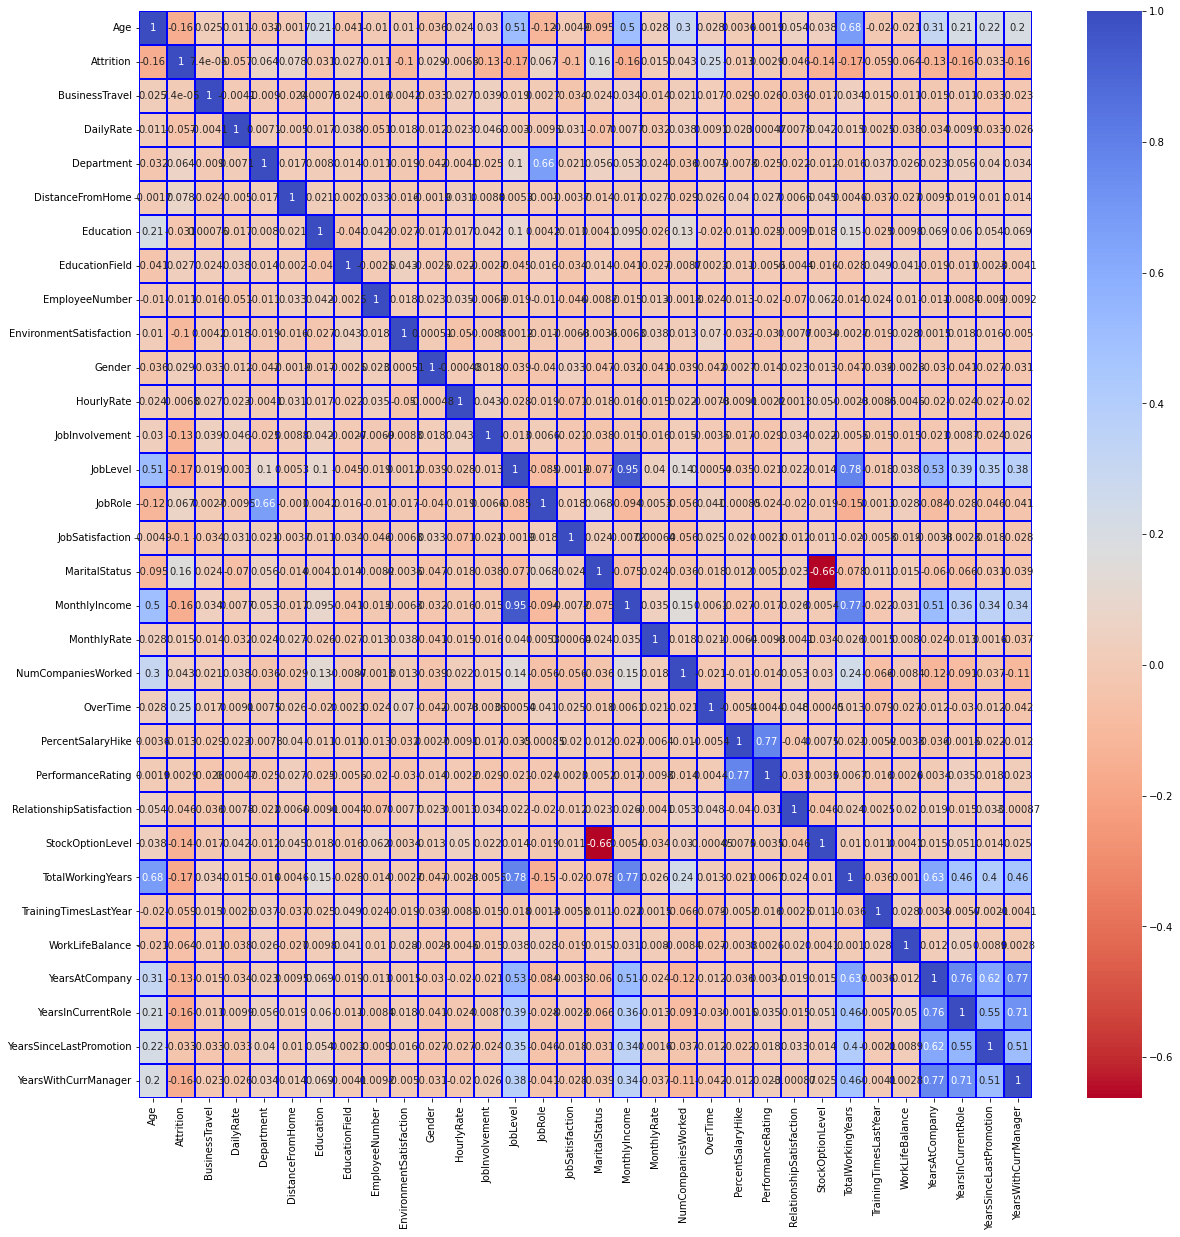

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(hr_analytics_corr, annot=True, linewidths=2, linecolor="blue", cmap="coolwarm_r")

In [59]:
hr_analytics.drop(columns=["YearsSinceLastPromotion","RelationshipSatisfaction","PerformanceRating","PercentSalaryHike",
                          "NumCompaniesWorked","MonthlyRate","HourlyRate","Gender","EmployeeNumber","EducationField",
                          "Education"],inplace=True)
hr_analytics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,3,2,7.0,...,2.0,5993,1.0,0,8,0,1,6,4,5
1,49,0.0,1.0,279,1.0,8,3,2,2,6.0,...,1.0,5130,0.0,1,10,3,3,10,7,7
2,37,1.0,2.0,1373,1.0,2,4,2,1,2.0,...,2.0,2090,1.0,0,7,3,3,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,3,1,6.0,...,1.0,2909,1.0,0,8,3,3,8,7,0
4,27,0.0,2.0,591,1.0,2,1,3,1,2.0,...,1.0,3468,0.0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,3,4,2,2.0,...,1.0,2571,0.0,1,17,3,3,5,2,3
1466,39,0.0,2.0,613,1.0,6,4,2,3,0.0,...,1.0,9991,0.0,1,9,5,3,7,7,7
1467,27,0.0,2.0,155,1.0,4,2,4,2,4.0,...,1.0,6142,1.0,1,6,0,3,6,2,3
1468,49,0.0,1.0,1023,2.0,2,4,2,2,7.0,...,1.0,5390,0.0,0,17,3,2,9,6,8


These all columns are to be dropped as they dont have correlation with the target variable

# Verifying Class Imblance Problem:

In [60]:
#Taking all independent variables in x
x=hr_analytics.drop(columns=["Attrition"])
x


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,3,2,7.0,4,2.0,5993,1.0,0,8,0,1,6,4,5
1,49,1.0,279,1.0,8,3,2,2,6.0,2,1.0,5130,0.0,1,10,3,3,10,7,7
2,37,2.0,1373,1.0,2,4,2,1,2.0,3,2.0,2090,1.0,0,7,3,3,0,0,0
3,33,1.0,1392,1.0,3,4,3,1,6.0,3,1.0,2909,1.0,0,8,3,3,8,7,0
4,27,2.0,591,1.0,2,1,3,1,2.0,2,1.0,3468,0.0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,3,4,2,2.0,4,1.0,2571,0.0,1,17,3,3,5,2,3
1466,39,2.0,613,1.0,6,4,2,3,0.0,1,1.0,9991,0.0,1,9,5,3,7,7,7
1467,27,2.0,155,1.0,4,2,4,2,4.0,2,1.0,6142,1.0,1,6,0,3,6,2,3
1468,49,1.0,1023,2.0,2,4,2,2,7.0,2,1.0,5390,0.0,0,17,3,2,9,6,8


In [61]:
# Taking dependent variable in y
y=hr_analytics.Attrition
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

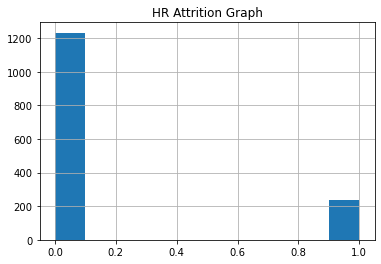

In [62]:
hr_analytics["Attrition"].hist(grid=True)
plt.title("HR Attrition Graph")
plt.show()

There is a class imbalance problem as there are many people who are not part of turnover and very few people leave company

Finding best rendom State:

In [63]:
from sklearn import preprocessing
from sklearn import utils

In [64]:
lab = preprocessing.LabelEncoder()
y= lab.fit_transform(y)

In [65]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [66]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

NameError: name 'SMOTE' is not defined

In [67]:
x.shape

(1470, 20)

In [68]:
y.shape

(1470,)

<AxesSubplot:ylabel='count'>

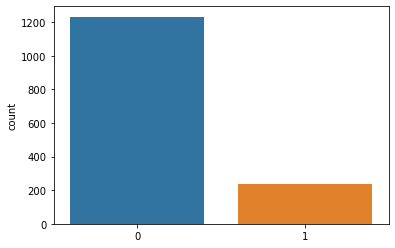

In [69]:
sns.countplot(y)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [72]:
vif_cal()

    VIF FACTOR                 FEATURES
0    27.465130                      Age
1     6.508814           BusinessTravel
2     4.824683                DailyRate
3    12.862087               Department
4     2.277004         DistanceFromHome
5     6.853915  EnvironmentSatisfaction
6    13.696801           JobInvolvement
7    52.169982                 JobLevel
8     8.050170                  JobRole
9     6.742916          JobSatisfaction
10    5.431994            MaritalStatus
11   31.897220            MonthlyIncome
12    1.419369                 OverTime
13    3.186646         StockOptionLevel
14   13.690994        TotalWorkingYears
15    5.547943    TrainingTimesLastYear
16   13.847996          WorkLifeBalance
17    9.299081           YearsAtCompany
18    6.281457       YearsInCurrentRole
19    6.461445     YearsWithCurrManager


In [73]:
from sklearn.decomposition import PCA

In [74]:
pca=PCA(n_components=12)

In [75]:
x=pca.fit_transform(x)
x

array([[-5.09731710e+02, -2.99854546e+02,  1.45859677e+00, ...,
        -2.92827856e+00, -1.48726046e+00,  3.85136326e-01],
       [-1.37326363e+03,  5.22572657e+02,  1.29484262e+01, ...,
         1.50097033e-01,  7.41679621e-01,  2.03837141e-02],
       [-4.41255584e+03, -5.73455067e+02,  1.75884611e+00, ...,
         6.08186408e-02,  2.29825159e-01, -1.27802446e+00],
       ...,
       [-3.61379240e+02,  6.47246387e+02, -1.13970876e+01, ...,
        -2.84140398e+00,  4.29648705e-01,  1.08552205e+00],
       [-1.11276064e+03, -2.21255967e+02,  1.44162794e+01, ...,
         1.55755537e-01,  1.05703512e+00, -9.28135649e-01],
       [-2.09905590e+03,  1.73087988e+02, -2.55940126e+00, ...,
         2.12903424e-01, -4.79203563e-01,  5.90641414e-01]])

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [77]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  63  The model performs very well
At random_state:- 63
Training accuaracy_score is :- 84.4
Testing accuracy_score is:- 84.4 


At random state  86  The model performs very well
At random_state:- 86
Training accuaracy_score is :- 82.7
Testing accuracy_score is:- 82.7 




In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=97)

In [79]:
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
pred_train=lr.predict(x_train)

In [81]:
pred_test=lr.predict(x_test)

In [82]:
accuracy_score(y_test,pred_test)

0.8197278911564626

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       238
           1       0.80      0.07      0.13        56

    accuracy                           0.82       294
   macro avg       0.81      0.53      0.52       294
weighted avg       0.82      0.82      0.75       294



 Logistic Regression

In [85]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [86]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 83.60513416656794
Accuracy_score is :- 81.97278911564626


At cv:- 5
Cross validation score is :- 83.06122448979592
Accuracy_score is :- 81.97278911564626


At cv:- 6
Cross validation score is :- 82.92517006802723
Accuracy_score is :- 81.97278911564626


At cv:- 7
Cross validation score is :- 83.60544217687075
Accuracy_score is :- 81.97278911564626


At cv:- 8
Cross validation score is :- 82.72192028985508
Accuracy_score is :- 81.97278911564626


At cv:- 9
Cross validation score is :- 83.53741666251018
Accuracy_score is :- 81.97278911564626




In [87]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.8306122448979592 
The accuracy_score is: 0.8197278911564626


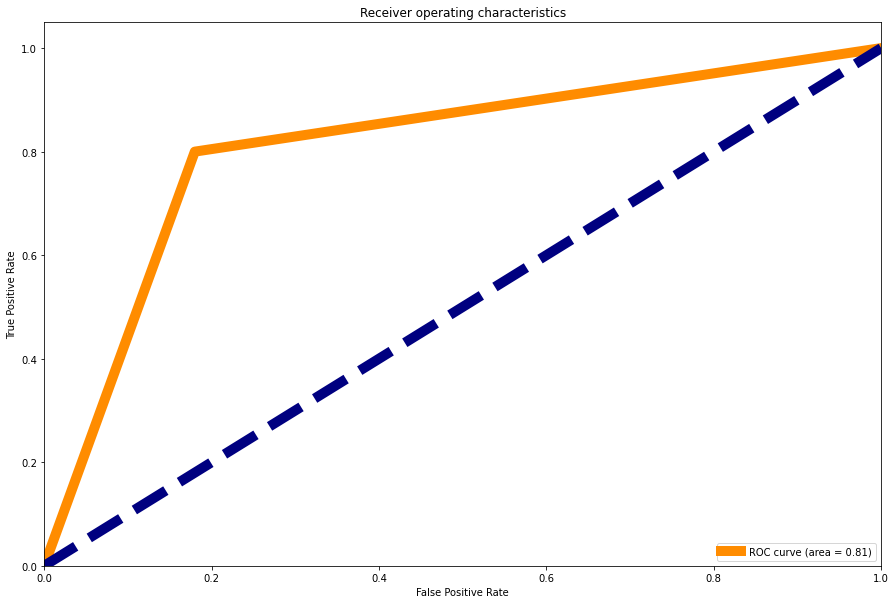

In [88]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
MAX_AUC=0
MAX_RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>MAX_AUC:
        MAX_AUC=acc
        MAX_RS=i
print("Best accuracy is ",MAX_AUC," on Random_state ",MAX_RS)

Best accuracy is  0.7936507936507936  on Random_state  126


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=114)

In [92]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
pred_train=DTC.predict(x_train)

In [94]:
pred_test=DTC.predict(x_test)

In [95]:
accuracy_score(y_test,pred_test)

0.7517006802721088

In [96]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       253
           1       0.18      0.22      0.20        41

    accuracy                           0.75       294
   macro avg       0.52      0.53      0.53       294
weighted avg       0.77      0.75      0.76       294



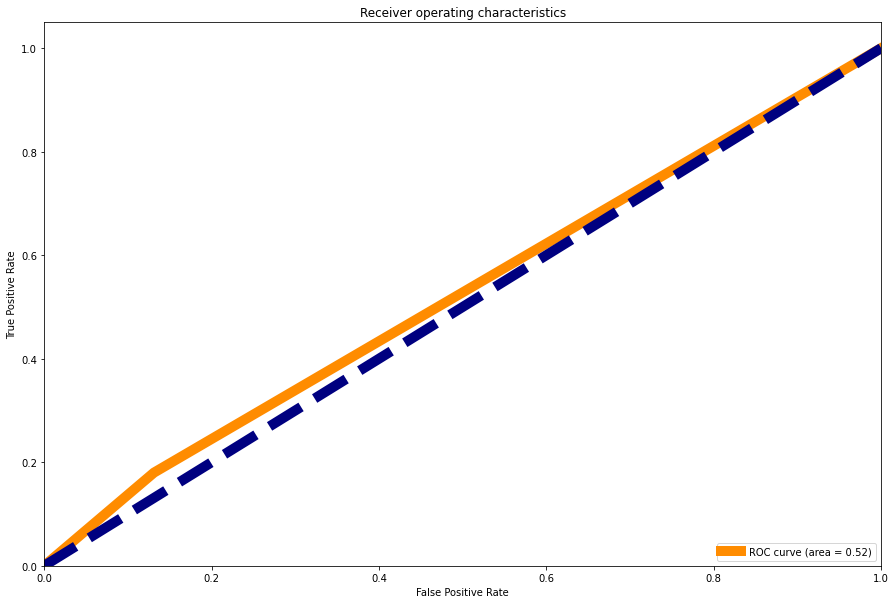

In [97]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

Area under ROC Curve is 54%

Cross Validation

In [98]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7421768707482993


In [99]:
pred_tc=DTC.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_tc)

In [100]:
for i in range(4,10):
    lsscore=cross_val_score(DTC,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 74.2199532045966
Accuracy_score is :- 75.17006802721087


At cv:- 5
Cross validation score is :- 75.30612244897958
Accuracy_score is :- 75.17006802721087


At cv:- 6
Cross validation score is :- 75.51020408163266
Accuracy_score is :- 75.17006802721087


At cv:- 7
Cross validation score is :- 73.74149659863946
Accuracy_score is :- 75.17006802721087


At cv:- 8
Cross validation score is :- 75.85234022333096
Accuracy_score is :- 75.17006802721087


At cv:- 9
Cross validation score is :- 74.49166209453504
Accuracy_score is :- 75.17006802721087




In [101]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(DTC,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7496598639455782 
The accuracy_score is: 0.7517006802721088


SVC

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [103]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8605442176870748
[[253   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       253
           1       0.00      0.00      0.00        41

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.74      0.86      0.80       294



In [104]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8387755102040817


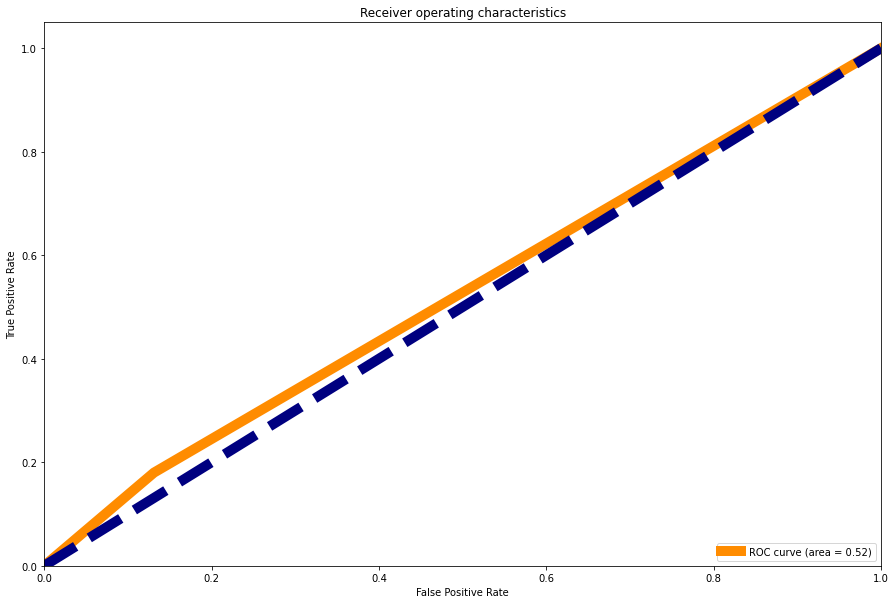

In [105]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

Area under ROC curve is 54%

KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

for i in range(0,3000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  206  The model performs very well
At random_state:- 206
Training accuaracy_score is :- 84.7
Testing accuracy_score is:- 84.7 


At random state  274  The model performs very well
At random_state:- 274
Training accuaracy_score is :- 85.0
Testing accuracy_score is:- 85.0 


At random state  660  The model performs very well
At random_state:- 660
Training accuaracy_score is :- 85.4
Testing accuracy_score is:- 85.4 


At random state  705  The model performs very well
At random_state:- 705
Training accuaracy_score is :- 85.4
Testing accuracy_score is:- 85.4 


At random state  953  The model performs very well
At random_state:- 953
Training accuaracy_score is :- 84.4
Testing accuracy_score is:- 84.4 


At random state  1124  The model performs very well
At random_state:- 1124
Training accuaracy_score is :- 85.0
Testing accuracy_score is:- 85.0 


At random state  1605  The model performs very well
At random_state:- 1605
Training accuaracy_score is :- 85.0
Testing accuracy_

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2512)

In [108]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [110]:
pred_test=kn.predict(x_test)

In [111]:
accuracy_score(y_train,pred_train)

0.7908163265306123

In [112]:
accuracy_score(y_test,pred_test)

0.8163265306122449

In [113]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       251
           1       0.24      0.12      0.16        43

    accuracy                           0.82       294
   macro avg       0.55      0.53      0.53       294
weighted avg       0.77      0.82      0.79       294



# Hyperparameter Tuning

In [114]:
mm=pd.DataFrame([["Logistic Regression","78%"],["Decision Tree Classifier","83%"],["KNeighbors Classifier","89%"],["SVC","87%"],["Random Forest Classifier","90%"],["Gradient Boosting","82%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

,Model_Name,R2_SCORE
0,Logistic Regression,78%
1,Decision Tree Classifier,83%
2,KNeighbors Classifier,89%
3,SVC,87%
4,Random Forest Classifier,90%
5,Gradient Boosting,82%


# saving the Model

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model,"HR_Analytics_Model.obj")